In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

import seaborn as sns

In [5]:
data = pd.read_excel("Data/train.xlsx")
test = pd.read_excel("Data/test.xlsx")

In [22]:
test = pd.read_excel("Data/test.xlsx")

In [21]:
data

,well id,"depth, m",bk,GZ1,GZ2,GZ3,GZ4,GZ5,GZ7,DGK,NKTD,NKTM,NKTR,ALPS,lith,goal
0,12.0,3042.4630,0.455779,0.774000,0.774000,0.332846,0.476545,0.774000,0.244898,0.123651,0.774000,0.799167,0.174639,0.727789,NK,0.0
1,33.0,2412.8305,-1.000000,0.157153,0.755472,0.453216,0.715147,-1.000000,0.523432,0.388729,0.519233,0.799167,0.563573,0.111216,ARGILLIT,0.0
2,33.0,2522.5575,-1.000000,0.172235,0.941742,0.525711,0.668600,-1.000000,0.588924,0.515214,0.527139,0.799167,0.551152,0.172359,ARGILLIT,0.0
3,49.0,2396.3625,0.381248,0.246838,0.116913,0.732654,0.151299,0.165219,0.656955,0.445917,0.575175,0.799167,0.429433,0.253563,ARGILLIT,0.0
4,49.0,2399.0475,0.356867,0.226241,0.155473,0.613300,0.173949,0.297194,0.773218,0.392743,0.575725,0.799167,0.447169,0.959633,ARGILLIT,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465091,287.0,2217.3625,-1.000000,0.213477,0.121747,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.442153,-1.000000,-1.000000,0.712853,ARGILLIT,0.0
465092,287.0,2217.4520,-1.000000,0.215987,0.122570,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.444390,-1.000000,-1.000000,0.676591,ARGILLIT,0.0
465093,287.0,2217.5415,-1.000000,0.215987,0.119374,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.445926,-1.000000,-1.000000,0.718157,ARGILLIT,0.0
465094,287.0,2217.6310,-1.000000,0.215987,0.118723,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.447813,-1.000000,-1.000000,0.759722,ARGILLIT,0.0


In [12]:
data = data[np.isnan(data["well id"]) != True]
data = data[np.isnan(data["goal"]) != True]

In [13]:
data = data.fillna(-1)
delta = 200

In [19]:
ALL_SENSORS = ['bk', 'GZ1', 'GZ2', 'GZ3', 'GZ4', 'GZ5', 'GZ7', 'DGK', 'NKTD', 'NKTM', 'NKTR', 'ALPS']
sensors_cost = {
    "bk" : 2450,
    "GZ1" : 2050,
    "GZ2" : 2050,
    "GZ3" : 2050,
    "GZ4" : 2050,
    "GZ5" : 2050,
    "GZ7" : 2050,
    "DGK" : 1300,
    "NKTD" : 2050,
    "NKTM" : 2050,
    "NKTR" : 2050,
    "ALPS" : 1150
}

In [10]:
#df = data[(data["depth, m"] > min_depth) & (data["depth, m"] < min_depth + delta)]
    
target = df["goal"]
train = df.drop("goal", axis = 1)
train = train.drop("lith", axis = 1)
train = train.drop("well id", axis = 1)

In [14]:
features = list()
for min_depth in range(1000, int(max(data["depth, m"])), 100):
    df = data[(data["depth, m"] > min_depth) & (data["depth, m"] < min_depth + delta)]
    
    target = df["goal"]
    train = df.drop("goal", axis = 1)
    train = train.drop("lith", axis = 1)
    train = train.drop("well id", axis = 1)

    X_train, X_test, y_train, y_test = train_test_split(train, target, test_size = 0.33)

    scaler = preprocessing.StandardScaler()
    scaler.fit(X_train)

    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    from sklearn.ensemble import GradientBoostingClassifier
    clf = GradientBoostingClassifier(n_estimators=200)
    clf = clf.fit(X_train, y_train)

    data_outputs = clf.predict(X_test)

    importances = clf.feature_importances_
    
    features.append(importances[1:])
    

    print(f1_score(y_test, data_outputs))
    
features = np.array(features)

0.9251379038613081
0.8781742205078753
0.8229448961156278
0.8218773096821876
0.8776758409785933
0.8613496932515338
0.8176308539944903
0.8346055979643767
0.8328530259365996
0.7728107777097367
0.701397326852977
0.7026184538653368
0.7265235306874865
0.7213015968665262
0.6985455269974099
0.6901054746358615
0.672909129602043
0.6852996506315507
0.6311858076563959
0.6154960173787111
0.8263888888888888
0.736842105263158


In [15]:
clf.feature_importances_

array([0.67341928, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.16671823,
       0.0555467 , 0.04748008, 0.05683572])

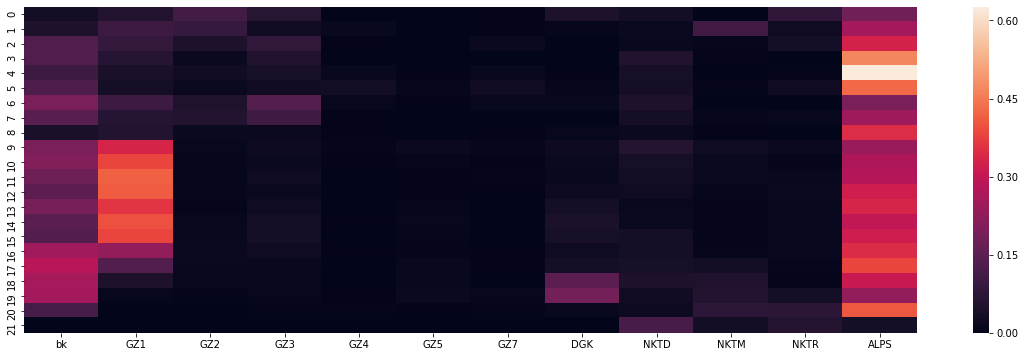

In [76]:
plt.figure(figsize = (20, 6))
sns.heatmap(features, xticklabels = df.columns[2:-2])

In [55]:
usable = train.columns[indices[-7:]]

In [32]:
usable

Index(['GZ2', 'NKTD', 'NKTR', 'NKTM', 'GZ5', 'GZ7', 'GZ4'], dtype='object')

In [35]:
for par in usable:
    data = data.drop(par, axis = 1)

In [44]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X_test, y_test, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.91 (+/- 0.00)


In [89]:
from sklearn.ensemble import GradientBoostingClassifier


class BagOfBoostings:
    def __init__(self, delta = 300, n_estimators = 200, test_size = 0.2):  
        self.delta = delta
        self.n_estimators = n_estimators
        self.test_size = test_size
        
    def split(self, df):
        wells = list(pd.unique(df['well id']))
        target = df[["goal", 'well id']]
        #target2
        train = df.drop(["goal", 'lith'], axis = 1)
        #train = train.drop("well id", axis = 1)
        train_well, test_well = train_test_split(wells , test_size = self.test_size, random_state = 42)
        X_train = train[train['well id'].isin(train_well)].drop("well id", axis = 1)
        X_test = train[train['well id'].isin(test_well)].drop("well id", axis = 1)
        Y_train = target[target['well id'].isin(train_well)].drop("well id", axis = 1)
        Y_test = target[target['well id'].isin(test_well)].drop("well id", axis = 1)
        return X_train, X_test, Y_train, Y_test, len(test_well), train, target['goal']
    
    def fit(self, data):
        self.data = data
    
    def predict(self, to_predict): # по одной скважине! 
        data = self.data
        min_range = min(to_predict["depth, m"])
        max_range = max(to_predict["depth, m"])
        result = []
        for min_depth in range(int(min_range), int(max_range), self.delta):
            df = data[(data["depth, m"] > min_depth) & (data["depth, m"] < min_depth + 10)] #alarm
            X_train, X_test, y_train, y_test, len_test, X, Y = self.split(df)
            clf = GradientBoostingClassifier(n_estimators=self.n_estimators)
            clf = clf.fit(X, Y) #да, фитим на всех данных, чтобы правильно оценить важность фичей
            f_importances = list(zip(train.columns, clf.feature_importances_))
            f_importances = sorted(f_importances, key=lambda tup: tup[1])[::-1]
            taken_features = ["depth, m"]
            prev_profit = -10000000000
            cost = 0
            for feature, _ in f_importances:
                taken_features.append(feature)
                tmp_clf = GradientBoostingClassifier(n_estimators=self.n_estimators)
                tmp_clf = tmp_clf.fit(X_train[taken_features], y_train)
                data_outputs = pd.Series(tmp_clf.predict(X_test[taken_features]))
                cost += self.delta * sensors_cost[feature] * len_test # сколько потратим на все скважины, почини
                func = lambda x: 4.15 * 0.7 * sum(x) * 0.085 * 100 * 860 - cost
                print(data_outputs, y_test)
                money = func(data_outputs * y_test) #смотрим, сколько по факту заработаем
                if prev_profit < money:
                    prev_profit = money
                else:
                    taken_features = taken_features[:-1] #выбрасываем ненужную фичу
                    break
            tmp_clf = GradientBoostingClassifier(n_estimators=self.n_estimators)
            tmp_clf = tmp_clf.fit(X_train[taken_features], y_train)
            data_outputs = pd.DataFrame(tmp_clf.predict(X_test[taken_features]))
            print(f1_score(y_test, data_outputs))
            tmp = func(y_test) - func(data_outputs)
            clf = GradientBoostingClassifier(n_estimators=self.n_estimators)
            clf = clf.fit(X[taken_features], Y)
            result.append((pd.DataFrame(clf.predict(to_predict[taken_features])), tmp))
        return result
        
        

In [90]:
model = BagOfBoostings()
model.fit(data)

In [91]:
ololo = model.predict(test[test['well id'] == 47])

D:\anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1173    0.0
1174    0.0
1175    0.0
1176    0.0
1177    0.0
Length: 1178, dtype: float64         goal
28       0.0
349      0.0
377      0.0
793      0.0
794      0.0
...      ...
384216   0.0
384217   0.0
384218   0.0
384219   0.0
384220   0.0

[1178 rows x 1 columns]


TypeError: unsupported operand type(s) for +: 'int' and 'str'